# Dogs vs Cats

## 1. Importing Necessary Libraries

In [1]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import random

# visualization
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# tensorflow
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))

['dogs-vs-cats']


## 2. Preprocessing

### Extracting zip files

In [2]:
from zipfile import ZipFile

with ZipFile("../input/dogs-vs-cats/train.zip","r") as z:
    z.extractall(".")
    
with ZipFile("../input/dogs-vs-cats/test1.zip","r") as z:
    z.extractall(".")
    
#print(os.listdir("/kaggle/working/train"))

### Turning train images to numpy arrays

In [3]:
path = "/kaggle/working/train"

X = []
y = []

# if dog, label it as 1
convert = lambda category : int(category == 'dog')

# this function read the unzipped images and appends them to X and y array
def create_train_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (80, 80))
        X.append(img_np)
        y.append(category)

In [4]:
create_train_data(path)

### Reshaping the data to be used

#### We reshape the X array in order to use in Convolutional Neural Network Layers.

In [5]:
X = np.array(X).reshape(-1,80,80,1)
y = np.array(y)

### Saving the arrays and downloading it, so we can use later

#### We can save the X and y array if we don't want to deal with them. And we can download it.

In [6]:
pickle.dump(X, open("x_train", "wb"))
pickle.dump(y, open("y_train", "wb"))

os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'y_train')

/kaggle/working/y_train

### Let's look at some images

#### Here we create a 0 to 24999 number list.

In [7]:
num_list = list(range(25000))

#### Here we chose random number from the list.

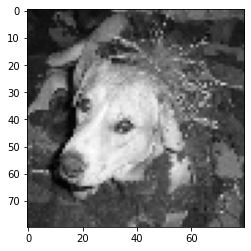

In [8]:
i = random.choice(num_list)
plt.imshow(X[i], cmap = "gray")

#### A dog

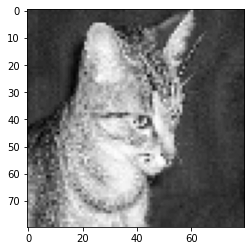

In [9]:
i = random.choice(num_list)
plt.imshow(X[i], cmap = "gray")

#### A cat

### Normalizing

#### Here we normalize the data so it converges faster to global minima.

In [10]:
X = X / 255

### Splitting data to train and validation set

#### Here we split the data to train and validation data.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20000, 80, 80, 1), (5000, 80, 80, 1), (20000,), (5000,))

## 3. Modeling and Predicting

#### Here we are constructing our CNN layers. We use Conv2D, MaxPooling2D, Dropout, Flatten and Dense layers.

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation = "relu", input_shape = (80,80,1)),
    Conv2D(32, (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Conv2D(64, (3,3), activation = "relu"),
    Conv2D(64, (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Conv2D(128, (3,3), activation = "relu"),
    Conv2D(128, (3,3), activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation = "relu", kernel_regularizer = l2(0.001)),
    Dropout(0.5),
    Dense(1, activation = "sigmoid")
])

#### Here we set compiler configurations.

In [14]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Here we save the history of fitting the data.

In [15]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 50, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/50
79/79 [==============================] - 16s 81ms/step - loss: 0.8156 - accuracy: 0.5118 - val_loss: 0.6988 - val_accuracy: 0.5076
Epoch 2/50
79/79 [==============================] - 5s 62ms/step - loss: 0.6905 - accuracy: 0.5470 - val_loss: 0.6904 - val_accuracy: 0.5290
Epoch 3/50
79/79 [==============================] - 5s 63ms/step - loss: 0.6834 - accuracy: 0.5779 - val_loss: 0.6318 - val_accuracy: 0.6608
Epoch 4/50
79/79 [==============================] - 5s 63ms/step - loss: 0.6337 - accuracy: 0.6576 - val_loss: 0.6100 - val_accuracy: 0.6796
Epoch 5/50
79/79 [==============================] - 5s 64ms/step - loss: 0.6088 - accuracy: 0.6797 - val_loss: 0.5748 - val_accuracy: 0.7306
Epoch 6/50
79/79 [==============================] - 5s 63ms/step - loss: 0.5846 - accuracy: 0.7080 - val_loss: 0.5756 - val_accuracy: 0.7080
Epoch 7/50
79/79 [==============================] - 5s 63ms/step - loss: 0.5529 - accuracy: 0.7348 - val_loss: 0.5418 - val_accuracy: 0.7510
Epoch 8/50
7

#### Let's see the accuracy.

In [16]:
_, accuracy = model.evaluate(X_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

157/157 [==============================] - 1s 5ms/step - loss: 0.2466 - accuracy: 0.9172
Accuracy: 91.72


#### Let's visualize model accuracy and model loss.

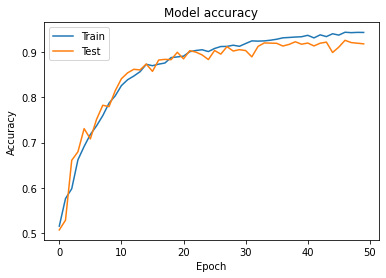

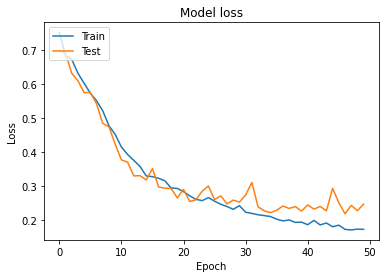

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

#### Let's see the confusion matrix.

<AxesSubplot:>

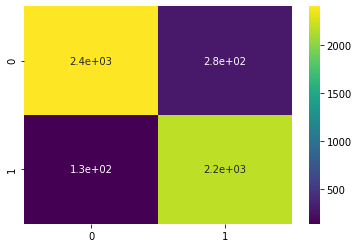

In [18]:
sns.heatmap(confusion_matrix(model.predict_classes(X_val), y_val), cmap = "viridis", annot = True)

#### It's time to predict the test data. Almost the same function with train function.

In [19]:
test_path = "/kaggle/working/test1"

X_test = []
id_line = []


def create_test_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (80, 80))
        X_test.append(img_np)

In [20]:
create_test_data(test_path)

### Reshaping

In [21]:
X_test = np.array(X_test).reshape(-1,80,80,1)

### Normalizing

In [22]:
X_test = X_test / 255

### Predicting Classes

In [23]:
pred = model.predict_classes(X_test)
pred = pred.flatten()

### Saving to DataFrame

In [24]:
df = pd.DataFrame({"id": id_line, "label": pred})

### Saving the DataFrame

In [25]:
df.to_csv("result.csv", index = False)

### Let's look at some images and predict them

In [26]:
def predict_class(to_predict):
    to_predict = to_predict.reshape(1,80,80,1)
    pred = model.predict_classes(to_predict)
    plt.imshow(to_predict.reshape(80,80,1), "gray")
    plt.show()
    if pred[0] == 1:
        return "dog"
    else:
        return "cat"

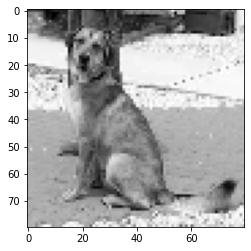

'dog'

In [27]:
predict_class(X_test[30])

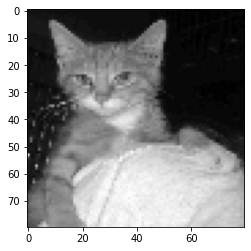

'cat'

In [28]:
predict_class(X_test[2532])